In [1]:
from model.vq_vae import *
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from matplotlib import pyplot as plt
from torchvision.utils import make_grid
from torchvision.transforms.functional import to_pil_image


In [6]:
# vq = BSQVectorQuantize(
#     h_input=28, w_input=28, in_chan=1, 
#     d_embedding=256, patch_size=4, 
#     bits=8, 
#     beta=0.15)
vq = torch.load('vq-epoch08.pth', weights_only=False, map_location='cpu')

In [3]:
dataset = MNIST(root='data', train=False, transform=ToTensor())

In [4]:
img, label = dataset[567]

In [7]:
encoding_indices, quantized, recons, loss = vq(img.unsqueeze(0))

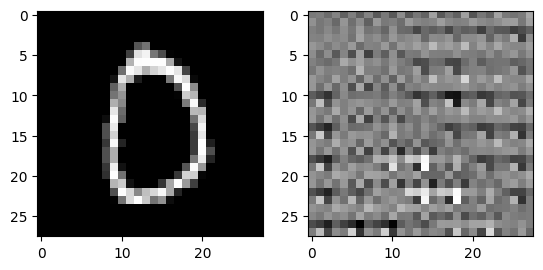

In [8]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(to_pil_image(img), cmap='gray')
ax[1].imshow(recons[0][0].detach().cpu().numpy(), cmap='gray')